In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Использую датасет Moscow schools - winners of educational Olympiads
#https://www.kaggle.com/datasets/romazepa/moscow-schools-winners-of-educational-olympiads?resource=download

df = pd.read_csv('/content/drive/MyDrive/data_colab/moscow schools - winners.csv')
df.head()

,FullName,ShortName,OlympiadType,Stage,Class,Subject,Status,Year,global_id
0,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3,11,Иностранный язык (английский язык),призёр,2012/2013,4472939
1,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3,11,Иностранный язык (английский язык),призёр,2012/2013,4472940
2,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3,10,Иностранный язык (английский язык),призёр,2012/2013,4472941
3,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,4,11,Иностранный язык (английский язык),победитель,2012/2013,4472942
4,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,3,11,Иностранный язык (английский язык),призёр,2012/2013,4472943


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74228 entries, 0 to 74227
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FullName      74228 non-null  object
 1   ShortName     74228 non-null  object
 2   OlympiadType  74228 non-null  object
 3   Stage         49808 non-null  object
 4   Class         74228 non-null  object
 5   Subject       74228 non-null  object
 6   Status        74228 non-null  object
 7   Year          74228 non-null  object
 8   global_id     74228 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


## Предобработка данных

In [ ]:
# анализ данных в столбце 'Class'
df['Class'].unique()

array(['11', '10', '9', '7', '8', '6', '5', '4', '2', '3', '1', 'Class',
       '12'], dtype=object)

In [ ]:
# замена на Nan значения 'Class'
df['Class'] = df['Class'].replace('Class', np.NaN)
df['Class'].unique()

array(['11', '10', '9', '7', '8', '6', '5', '4', '2', '3', '1', nan, '12'],
      dtype=object)

In [ ]:
# анализ данных в столбце 'global_id'
df['global_id'].head(100)

In [ ]:
df['global_id'] = df['global_id'].replace('global_id', np.NaN)
df['global_id'].unique()

array(['4472939', '4472940', '4472941', ..., '1060253198', '1060253199',
       '1060253200'], dtype=object)

In [ ]:
# анализ данных в столбце 'Stage'
df['Stage'].unique()

array(['3', '4', nan, 'Stage'], dtype=object)

In [ ]:
df['Stage'] = df['Stage'].replace('Stage', np.NaN)
df['Stage'].unique()

array(['3', '4', nan], dtype=object)

In [ ]:
# заменим пропуски 'Stage' модой
df['Stage'] = df['Stage'].fillna(df['Stage'].mode()[0])

In [ ]:
# анализ данных в столбце 'Stage'
df['Status'].unique()

array(['призёр', 'победитель', 'Status'], dtype=object)

In [ ]:
df['Status'] = df['Status'].replace('Status', np.NaN)
df['Status'].unique()

array(['призёр', 'победитель', nan], dtype=object)

In [ ]:
# заменим пропуски 'Stage' модой
df['Status'] = df['Status'].fillna(df['Status'].mode()[0])

In [ ]:
# анализ данных в столбце 'Year'
df['Year'].unique()

array(['2012/2013', '2014/2015', 'Year', '2013/2014', '2015/2016',
       '2016/2017', '2017/2018', '2018/2019', '2019/2020'], dtype=object)

In [ ]:
df['Year'] = df['Year'].replace('Year', np.NaN)
df['Year'].unique()

array(['2012/2013', '2014/2015', nan, '2013/2014', '2015/2016',
       '2016/2017', '2017/2018', '2018/2019', '2019/2020'], dtype=object)

In [ ]:
# заменим пропуски 'Stage' модой
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])

In [ ]:
df['Class'] = df['Class'].replace('Class', np.NaN)
df['Class'].unique()

array(['11', '10', '9', '7', '8', '6', '5', '4', '2', '3', '1', nan, '12'],
      dtype=object)

In [ ]:
df['Class'] = df['Class'].fillna(df['Class'].mode()[0])

In [ ]:
# количество пропусков (nan)
(df.isna().mean() * 100).round(2)

FullName        0.0
ShortName       0.0
OlympiadType    0.0
Stage           0.0
Class           0.0
Subject         0.0
Status          0.0
Year            0.0
global_id       0.1
dtype: float64

In [ ]:
# исправим типы данных
df['Stage'] = df['Stage'].astype('float64')
df['Class'] = df['Class'].astype('float64')
# df['global_id'] = df['global_id'].astype('float64')
df['global_id'] = df['global_id'].astype('float64')

In [ ]:
df['Stage'] = df['Stage'].astype('Int64')
df['Class'] = df['Class'].astype('Int64')
df['global_id'] = df['global_id'].astype('Int64')


In [ ]:
# приведение названий придеметов и олимпиад в более компактный вид

df['Subject'] = df['Subject'].replace('Информатика и Информационно-коммуникационные технологии (ИКТ)', 'ИКТ')
df['Subject'] = df['Subject'].replace('Иностранный язык (английский язык)', 'английский')
df['Subject'] = df['Subject'].replace('Иностранный язык (испанский язык)', 'испанский')
df['Subject'] = df['Subject'].replace('Иностранный язык (китайский язык)', 'китайский')
df['Subject'] = df['Subject'].replace('Иностранный язык (немецкий язык)', 'немецкий')
df['Subject'] = df['Subject'].replace('Иностранный язык (итальянский язык)', 'итальянский')
df['Subject'] = df['Subject'].replace('Иностранный язык (французский язык)', 'французский')
df['Subject'] = df['Subject'].replace('Мировая Художественная Культура (МХК)', 'МХК')
df['Subject'] = df['Subject'].replace('Основы безопасности жизнедеятельности', 'ОБЖ')
df['OlympiadType'] = df['OlympiadType'].replace('Всероссийская олимпиада', 'ВОШ').replace('Московская олимпиада', 'МОШ')

In [ ]:
df.head()

,FullName,ShortName,OlympiadType,Stage,Class,Subject,Status,Year,global_id
0,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,ВОШ,3,11,английский,призёр,2012/2013,4472939
1,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,ВОШ,3,11,английский,призёр,2012/2013,4472940
2,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,ВОШ,3,10,английский,призёр,2012/2013,4472941
3,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,ВОШ,4,11,английский,победитель,2012/2013,4472942
4,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,ВОШ,3,11,английский,призёр,2012/2013,4472943


In [ ]:
# так как одна и та же школа может по-разному отображаться в ShortName, возьмем только числовой номер школы и сделаем столбец ('numbers_of_school') только с номером
# нормализуем данные, удалим кавычки и приведем все символы к нижнему регистру, так как есть школы без номера, то чтобы названия пришли к единому виду,
# того, чтобы в дальнейшем можно было группировать по номеру школы

# функция поиска номера школы
import re

def number_of_school(row):
    # нормализация столбца с номерами школ - удаление кавычек и приведение к нижнему регистру
    number_of_school_normal = row['ShortName'].replace('«', '').replace('»', '').strip().lower()
    # поиск цифр в поле ShortName
    number_of_school = re.findall(r'\d+', number_of_school_normal)
    row['start_year'] = row['Year'].split('/')[0]
    if  number_of_school:
        row['numbers_school'] = number_of_school[0]
    else:
        row['numbers_school'] = number_of_school_normal
    return row

In [ ]:
df = df.apply(number_of_school, axis = 1)
df.head(10)

,FullName,ShortName,OlympiadType,Stage,Class,Subject,Status,Year,global_id,start_year,numbers_school
0,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,ВОШ,3,11,английский,призёр,2012/2013,4472939,2012,гбоу лицей вторая школа
1,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,ВОШ,3,11,английский,призёр,2012/2013,4472940,2012,гбоу лицей вторая школа
2,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,ВОШ,3,10,английский,призёр,2012/2013,4472941,2012,гбоу лицей вторая школа
3,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,ВОШ,4,11,английский,победитель,2012/2013,4472942,2012,26
4,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,ВОШ,3,11,английский,призёр,2012/2013,4472943,2012,26
5,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 56,ВОШ,3,10,английский,призёр,2012/2013,4472944,2012,56
6,Государственное бюджетное образовательное учре...,ГБОУ ЦО № 57,ВОШ,3,10,английский,призёр,2012/2013,4472945,2012,57
7,Государственное бюджетное образовательное учре...,ГБОУ ЦО № 57,ВОШ,3,11,английский,призёр,2012/2013,4472946,2012,57
8,Государственное бюджетное общеобразовательное ...,ГБОУ лицей № 138,ВОШ,3,11,английский,призёр,2012/2013,4472947,2012,138
9,Государственное бюджетное образовательное учре...,ГБОУ ЦО № 218,ВОШ,3,11,английский,призёр,2012/2013,4472948,2012,218


In [ ]:
# преобразование типа года
df['Year']  = pd.to_numeric(df['start_year'])

## Графики

### 1. Bar Chart - Сколько призеров и сколько победителей в каждой олимпиаде (здесь их всего две ВОШ и МОШ)

In [ ]:
# в какой олимпиаде больше участников
olimp = df.filter(items = ['OlympiadType', 'Class']).groupby(['OlympiadType']).count().sort_values(by = 'Class', ascending=False)
olimp

NameError: ignored

In [ ]:
# группировка по OlympiadType и по Status
win_and_awardee =  df.filter(items = ['Status', 'OlympiadType', 'Class']).groupby(['Status', 'OlympiadType']).count().sort_values(by = 'Class', ascending=False)

# удаление строки подзаголовка
win_and_awardee.drop(win_and_awardee.tail(1).index, inplace=True)
win_and_awardee

Class
Status     OlympiadType       
призёр     ВОШ           44197
           МОШ           19580
победитель ВОШ            5537
           МОШ            4840

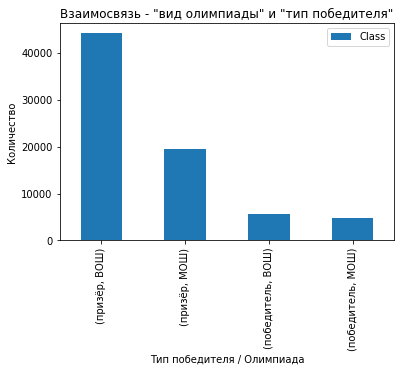

In [ ]:
# столбчатая диаграмма показывает количество призеров и победителей по каждой олимпиаде в целом
win_and_awardee.plot(kind='bar',
                     title='Взаимосвязь - "вид олимпиады" и "тип победителя"',
                     xlabel='Тип победителя / Олимпиада',
                     ylabel='Количество')

In [ ]:
# cоставим сводную таблицу процентного соотношения между видом олимпиады и статусом победителя, мы узнаем в какой олимпиаде чаще становятся победителями
win = pd.pivot_table(win_and_awardee, index = 'OlympiadType', columns = 'Status', values = 'Class', aggfunc = np.sum)
win['количество участников'] =  win['победитель'] + win['призёр']
# win.info()
win['%победителей'] = round((win['победитель'] * 100) / win['количество участников'], 2)
win['%призеров'] =  round(win['призёр'] * 100 / win['количество участников'].round(), 2)
win

Status,победитель,призёр,количество участников,%победителей,%призеров
OlympiadType,,,,,
ВОШ,5537,44197,49734,11.13,88.87
МОШ,4840,19580,24420,19.82,80.18


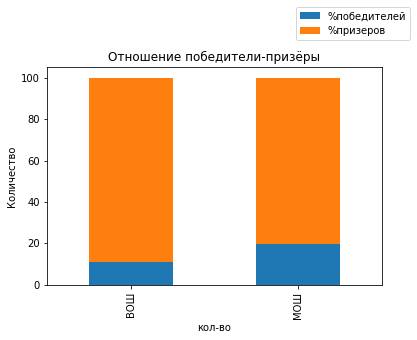

In [ ]:
# столбчатая диаграмма с накоплением, показывает количество призеров и победителей в процентном соотношении от общего количества участников в конкретной олимпиаде
win.filter(['%победителей', '%призеров']).plot(kind='bar', stacked=True,
                     title='Отношение победители-призёры',
                     xlabel='кол-во',
                     ylabel='Количество')
plt.legend(bbox_to_anchor=(0.6, 0.8, 0.5, 0.5))

####  ВЫВОД: в МОШ становятся победителями чаще! Гипотеза: в МОШ легче задания или менее строгие критерии

In [ ]:

win_vosh_subj =  df.filter(items = ['Status', 'OlympiadType', 'Subject', 'Class'])filter.groupby(['Subject', 'OlympiadType']).count().sort_values(by = 'Class', ascending=False)
win_only_vosh = df['OlympiadType'].isin(['ВОШ'])
win_vosh_subj = df[win_only_vosh].filter(items = ['Subject', 'Status','Class']).groupby(['Subject', 'Status']).count().sort_values(by = 'Class', ascending=False).reset_index()
win_vosh_subj = pd.pivot_table(win_vosh_subj , index = 'Subject', columns = 'Status', values = 'Class')

win_vosh_subj

In [ ]:
# Распределение победителей и призёров ВОШ по предметам
win_vosh_subj.plot(kind='bar', stacked=True, sort_columns = True)
plt.legend(bbox_to_anchor=(0.6, 0.8, 0.5, 0.5))

NameError: ignored

Вывод:  топ популярных предметов и победителей по гуманитарным предметам. Наименьшее количество участников в ИКТ, мхк, астрономия, китайский, итальянский, в этих предметах меньше конкуренция, следовательно больше шансов стать победителем. Гипотеза - Обществознание очень популярно, так можно получить БВИ в ВУЗы, следовательно олимпиадники стремятся на специальности, где требуется Обществознание - юридические, экономические специальности. Предмет ИКТ(информатика) принимается на малое количество технических специальностей в ВУЗах, поэтому предпочитают сдавать математику или физику. Либо предмет ИКТ плохо преподается в школах и ученики "не тянут" олимпиады.

### 2. Line Chart - Распределение количества победителей и призёров по годам - линейная диаграмма

In [ ]:
# распределение победителей и призеров по годам

win_vosh_year =  df.filter(items = ['Status', 'OlympiadType', 'Year', 'Class']).groupby(['Status', 'OlympiadType', 'Year']).count().sort_values(by = 'Class', ascending=False)

win_only_vosh = df['OlympiadType'].isin(['ВОШ'])
win_vosh_year = df[win_only_vosh].filter(items = ['start_year', 'Status','Class']).groupby(['start_year', 'Status']).count().sort_values(by = 'start_year', ascending=False).reset_index()
win_vosh = pd.pivot_table(win_vosh_year, index = 'start_year', columns = 'Status', values = 'Class')

win_vosh

Status,победитель,призёр
start_year,,
2012,158,2922
2013,187,3751
2014,603,5127
2015,733,5927
2016,811,6154
2017,1004,6244
2018,1086,6997
2019,955,7075


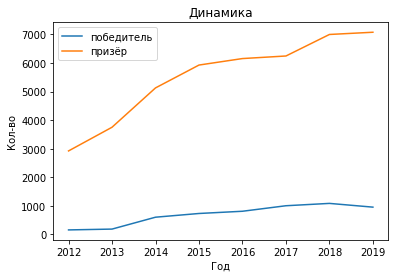

In [ ]:
# применяем функцию plot из matplotlib
for status in win_vosh.columns:
    plt.plot(win_vosh.index, win_vosh[status])\

plt.title('Динамика')
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.legend(win_vosh)

In [ ]:
win_mosh_year =  df.filter(items = ['Status', 'OlympiadType', 'start_year', 'Class']).groupby(['Status', 'OlympiadType', 'start_year']).count().sort_values(by = 'start_year', ascending=False)

win_only_mosh = df['OlympiadType'].isin(['МОШ'])
win_mosh_year = df[win_only_mosh].filter(items = ['start_year', 'Status','Class']).groupby(['start_year', 'Status']).count().sort_values(by = 'start_year', ascending=False).reset_index()
win_mosh = pd.pivot_table(win_mosh_year, index = 'start_year', columns = 'Status', values = 'Class')

win_mosh

Status,победитель,призёр
start_year,,
2012,412,1905
2013,594,2337
2014,588,2602
2015,643,2649
2016,701,2819
2017,782,3206
2018,1120,4062


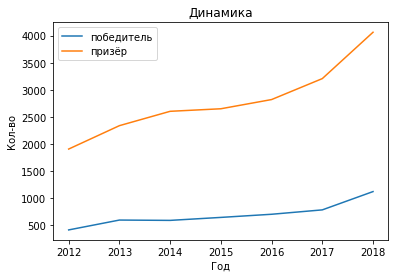

In [ ]:
for status in win_mosh.columns:
    plt.plot(win_mosh.index, win_mosh[status])\

plt.title('Динамика')
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.legend(win_mosh)

In [ ]:
win_olimp_year =  df.filter(items = ['Status', 'OlympiadType', 'start_year', 'Class']).groupby(['Status', 'OlympiadType', 'start_year']).count().sort_values(by = 'start_year', ascending=False).reset_index()
win_olimp_year.drop(win_olimp_year .head(3).index, inplace=True)
win_olimp_year.head(5)


,Status,OlympiadType,start_year,Class
3,победитель,ВОШ,2018,1086
4,призёр,ВОШ,2018,6997
5,победитель,МОШ,2018,1120
6,призёр,МОШ,2018,4062
7,победитель,ВОШ,2017,1004


In [ ]:
# функция, которая поможет подготовить данные для сводной таблицы, чтобы построить линейную зависимость год - количество победителей
def distribution(row):
    if row['OlympiadType'] == 'ВОШ' and row['Status'] == 'победитель':
        row['Status'] = 'победитель-ВОШ'
    elif row['OlympiadType'] == 'ВОШ' and row['Status'] == 'призёр':
        row['Status'] = 'призёр-ВОШ'
    elif row['OlympiadType'] == 'МОШ' and row['Status'] == 'победитель':
        row['Status'] = 'победитель-МОШ'
    elif row['OlympiadType'] == 'МОШ' and row['Status'] == 'призёр':
        row['Status'] = 'призёр-МОШ'
    return row

In [ ]:
wins = win_olimp_year.apply(distribution, axis=1)
wins.head(5)

,Status,OlympiadType,start_year,Class
3,победитель-ВОШ,ВОШ,2018,1086
4,призёр-ВОШ,ВОШ,2018,6997
5,победитель-МОШ,МОШ,2018,1120
6,призёр-МОШ,МОШ,2018,4062
7,победитель-ВОШ,ВОШ,2017,1004


In [ ]:
# делаем сводную таблицу
wins_olimps = pd.pivot_table(wins, index = 'start_year', columns = 'Status', values = 'Class')
wins_olimps

Status,победитель-ВОШ,победитель-МОШ,призёр-ВОШ,призёр-МОШ
start_year,,,,
2012,158,412,2922,1905
2013,187,594,3751,2337
2014,603,588,5127,2602
2015,733,643,5927,2649
2016,811,701,6154,2819
2017,1004,782,6244,3206
2018,1086,1120,6997,4062


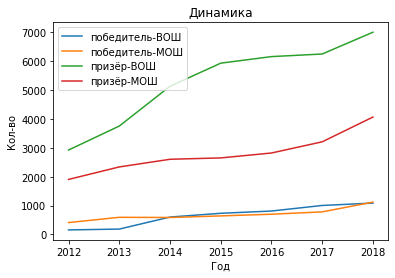

In [ ]:
# Строим линейную зависмость
for status in wins_olimps.columns:
    plt.plot(wins_olimps.index, wins_olimps[status])\

plt.title('Динамика')
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.legend(wins_olimps)

ВЫВОД: Больше всего призеров ВОШ. По всем показателям динамика положительная. Больше победителей с каждым годом, НО количество призеров растет сильнее, чем количество победителей. Гипотеза - все больше учащихся дедают ставку на участие в олимпиадах, так как можно получить БВИ для поступления в ВУЗ.

### 3. Area Chart для сравнения победителей по статусам

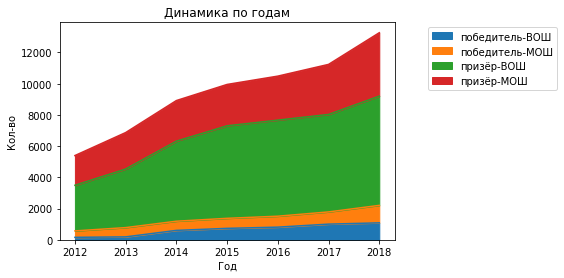

In [ ]:
wins_olimps.plot(kind='area',
                             title='Динамика по годам',
                             xlabel='Год',
                                # stacked=False,
                             ylabel='Кол-во')
plt.legend(bbox_to_anchor=(1.0, .5, 0.5, 0.5))

ВЫВОД: Максимально растет количество призеров ВОШ. Гипотеза - все больше учащихся дедают ставку на участие в олимпиадах, так как можно получить БВИ для поступления в ВУЗ. Уровень подготовки учащихся растет.

### 4. Таблица, показывающая ТОП школ по победителям

In [ ]:
# Сделаем сводную таблицу распределения победителей по школам

win_school =  df.filter(items = ['numbers_school', 'Status', 'Class']).groupby(['numbers_school', 'Status']).count().sort_values(by = 'Class', ascending=False)
win_school_status = pd.pivot_table(win_school, index = 'numbers_school', columns = 'Status', values = 'Class').sort_values(by = 'победитель', ascending=False)
win_school_status['Общее количество победителей'] = win_school_status['победитель'] +  win_school_status['призёр']
win_school_status.drop(win_school_status.tail(1242).index, inplace=True)
win_school_status_ = win_school_status.filter(items=['numbers_school', 'Общее количество победителей']).sort_values(by = 'Общее количество победителей', ascending=False).reset_index()

win_school_status_

Status,numbers_school,Общее количество победителей
0,гбоу лицей вторая школа,2330.0
1,179,2329.0
2,57,2129.0
3,1535,1689.0
4,2007,1640.0
5,фгбоу впо мгу им. м.в. ломоносова . сунц мгу,1489.0
6,1543,1388.0
7,1514,1198.0
8,1329,1162.0
9,1568,1117.0


In [ ]:
win_school_status_.style.bar(align='mid')

Status,numbers_school,Общее количество победителей
0,гбоу лицей вторая школа,2330.000000
1,179,2329.000000
2,57,2129.000000
3,1535,1689.000000
4,2007,1640.000000
5,фгбоу впо мгу им. м.в. ломоносова . сунц мгу,1489.000000
6,1543,1388.000000
7,1514,1198.000000
8,1329,1162.000000
9,1568,1117.000000


### ВЫВОД: В таблице представлены ТОП школ по количеству победителей в олимпиадах. Гипотеза - данные школы являются лучшими в рейтинге школ Москвы. В районах, где находятся школы, проживают люди с большим достатком, для которых важен уровень образования детей.

## 5. Boxplot Chart - покажет выбросы, неверные данные, похожие на ошибки в данных

In [ ]:
# Сделаем свождную таблицу по общему количеству победилей, распереденных по классам обучения

win_class =  df.filter(items = ['Class', 'Status', 'Stage']).groupby(['Class', 'Status']).count().sort_values(by = 'Stage', ascending=False)
win_class_common = pd.pivot_table(win_class, index = 'Class', columns = 'Status', values = 'Stage').sort_values(by = 'победитель', ascending=False)
win_class_common['Общее количество победителей'] = win_class_common['победитель'] +  win_class_common['призёр']
win_class_common_ = win_class_common.filter(items=['Class', 'Общее количество победителей']).sort_values(by = 'Общее количество победителей', ascending=False).reset_index()
win_class_common_

Status,Class,Общее количество победителей
0,11,23457
1,10,18716
2,9,17179
3,8,4276
4,7,3657
5,6,3626
6,5,2644
7,4,283
8,3,204
9,2,99


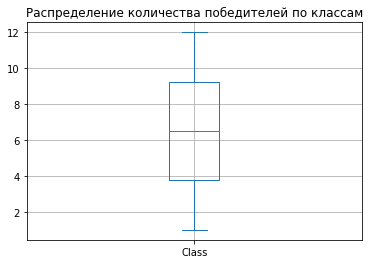

In [ ]:
win_class_common_['Class'].plot(kind='box',
                   title='Распределение количества победителей по классам', grid=True)

### ВЫВОД: 12 и -1-2 класс скорее всего ошибочны, так как 12-го класса не существует в Российской системе образования, начальная школа не принимает участия в таких олимпиадах

## 6. Scatter chart (точечная диаграмма) - распределение победителей по классам

(1.0, 15.0)

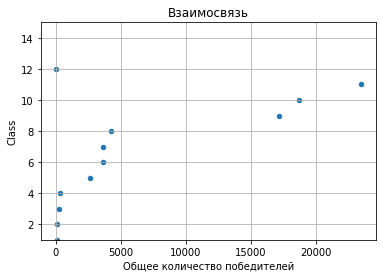

In [ ]:
# Взаимосвязь между классом и количеством побеждающих

win_class_common_.plot(kind='scatter',
        x='Общее количество победителей',
        y='Class',
        title='Взаимосвязь', grid = True)
plt.ylim(1, 15)




### Больше всего победителей в 11-м классе. Гипотеза - одиннадцатиклассники лучше всего подготовлены, имеют более высокий уровень знаний. Для 9-11 классников участие в олимпиадах наиболее необходимо, так как дает БВИ в ВУЗ.